In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



import scipy
from scipy.io import loadmat
from scipy import optimize


from PIL import Image


%matplotlib inline

In [53]:
data = scipy.io.loadmat("mnist-digit.mat")
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [54]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

**Features**

In [55]:
X = data['X']
y = data['y']

In [56]:
X_ = X.T

In [57]:
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

**0 is labelled as 10**

In [58]:
t = np.zeros(5000, dtype=int)
for i in range(5000):
    if y[i]==10:
        t[i]==0
    else:
        t[i] = y[i]
        
y = t

In [59]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
np.random.seed(19)
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, shuffle = True)

In [17]:
y_train

array([[2],
       [8],
       [2],
       ...,
       [2],
       [1],
       [5]], dtype=uint8)

**Labels**

In [62]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [11]:
X_train.shape

(3500, 400)

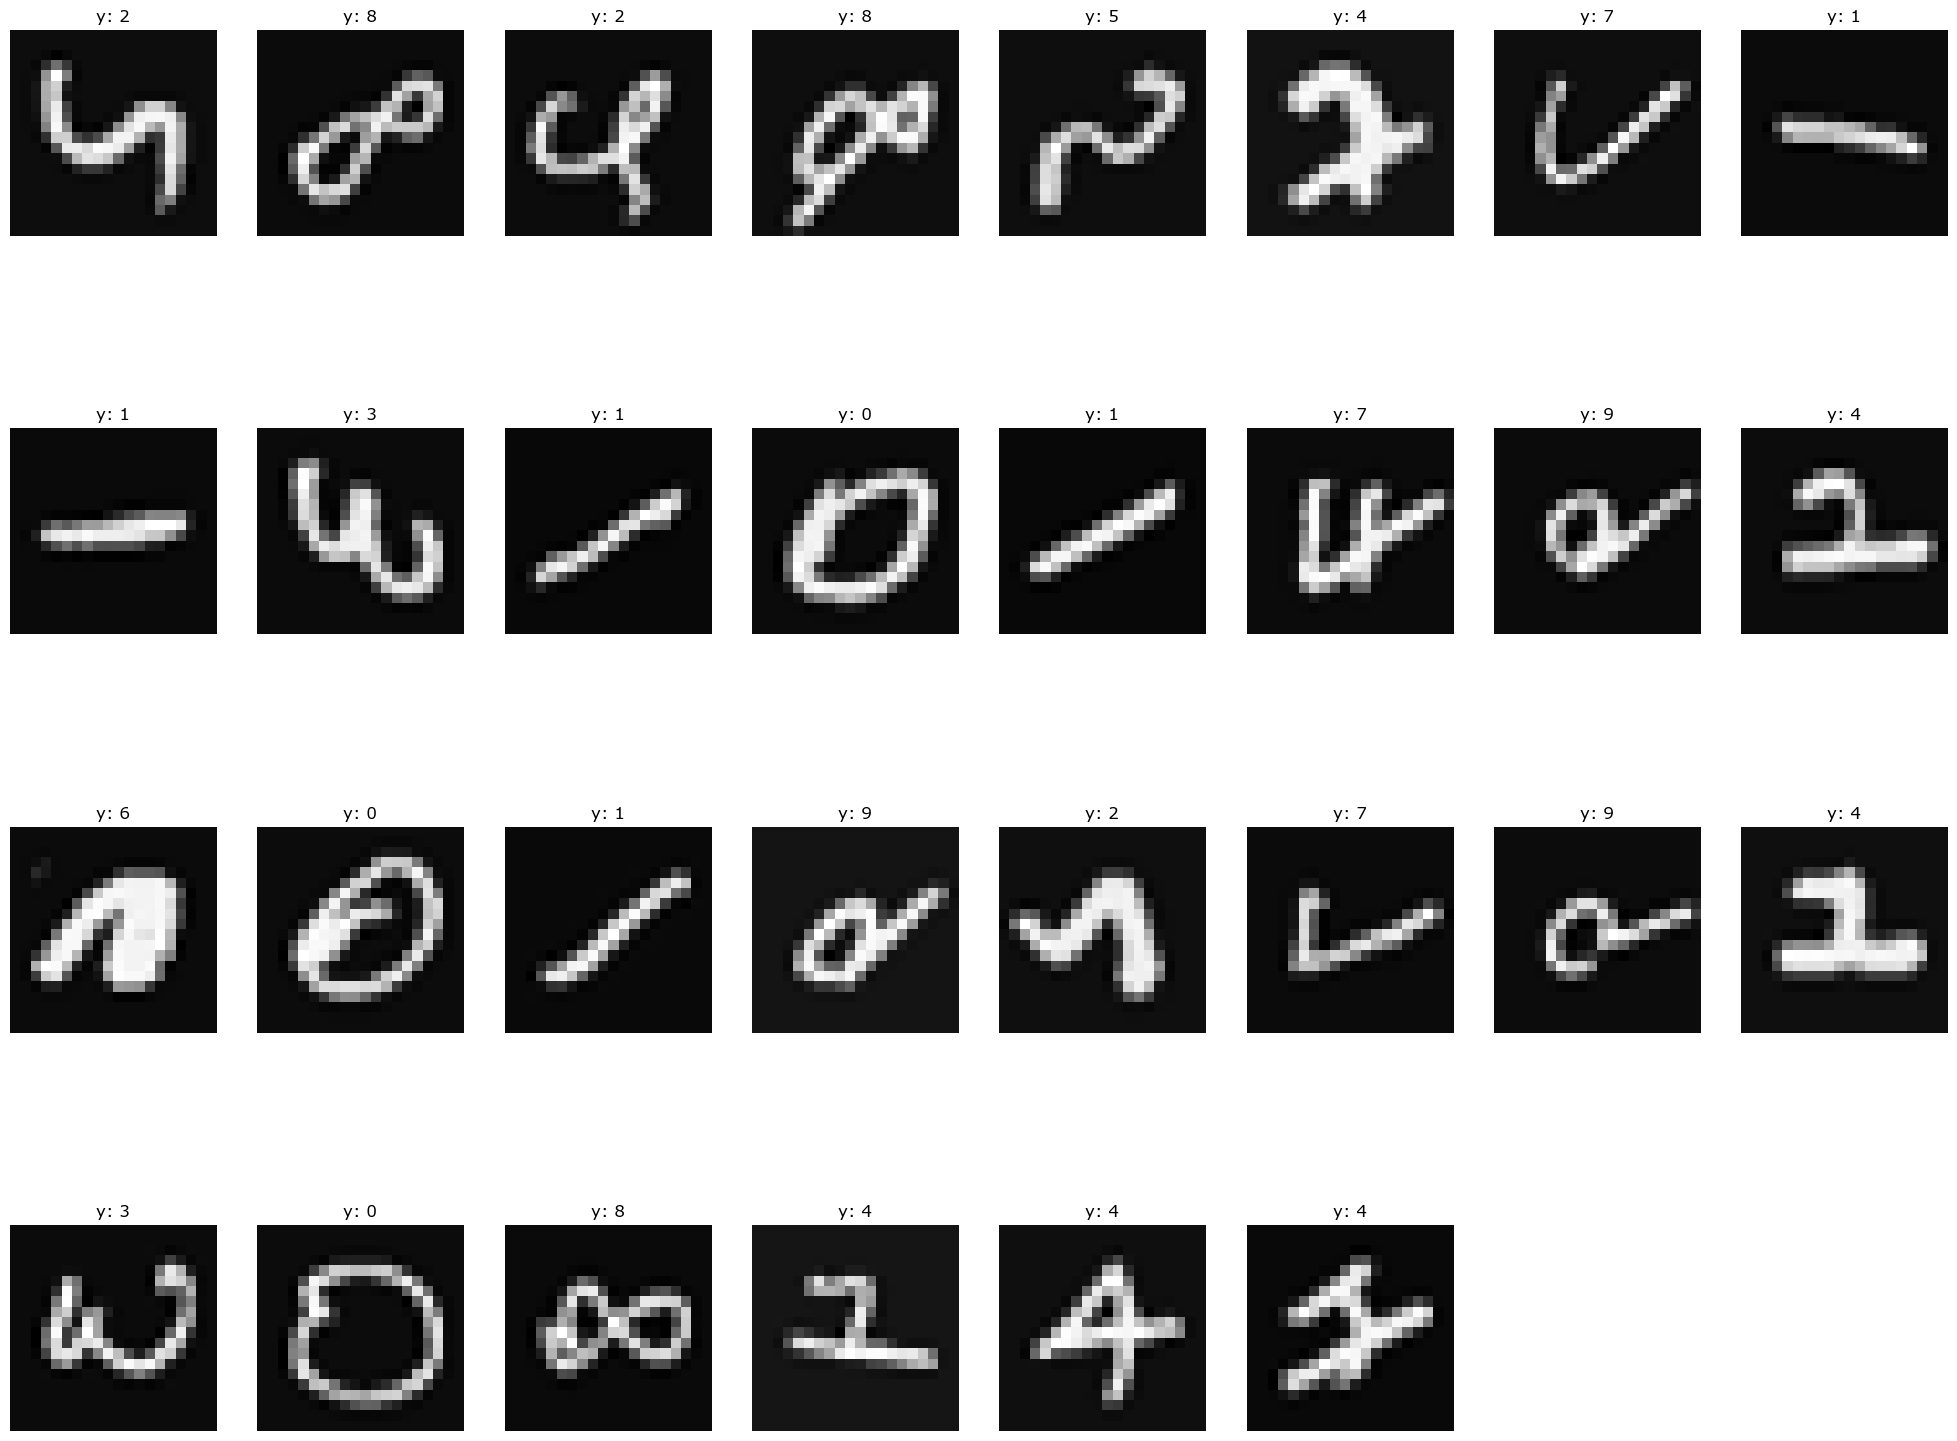

In [51]:
fig = plt.figure(figsize=(25,25))
for i in range(30):  
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(X_train[i].reshape(20,20), cmap=plt.get_cmap('gray'))
    ax.set_title('y: {y}'.format(y=y_train[i]))
    plt.axis('off')

**Defining Functions**

In [12]:
        
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [13]:
m = X.shape[0]
def costFunction(w, X, y):
    
    h = sigmoid(np.dot(X,w))
    J = -1/m * np.sum(y*np.log(h)+ (1-y)*np.log(1-h))
    grad = 1/m *(np.dot(X.T, h-y))
    
    return J,grad

def predict(w_optimized, X):
    
    z = np.dot(X,w_optimized)
    p1  = sigmoid(z)
    p = np.round(p1)
    
    return p

In [63]:
m = X_train.shape[0]
X = np.concatenate([np.ones((m,1)), X_train], axis = 1)

In [64]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**One-Hot Encoding of labels**

In [65]:
def one_hot(y, c):
    
    y_one_hot = np.zeros((len(y), c))
    
    y_one_hot[np.arange(len(y)), y] = 1
    
    return y_one_hot

In [84]:
y1 = one_hot(y_train,10)
y1

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Normalisation of featues:**

In [83]:
Xn = X/255

**Optimization**

In [24]:
w0 = np.ones(401)
options = {'maxiter' : 5000}
loss_list = []
wa = []

        
for i in range(0,10):
    
    res = optimize.minimize(fun=costFunction, x0=w0, args=(Xn, y1[:,i]),method = 'CG', jac=True, options=options)
    w_opt = res.x
    wa.append(w_opt)

**Predictions using the optimized weights**

In [67]:
h = sigmoid(np.dot(Xn,wa[0]))

In [68]:
y_pred = predict(wa[0],Xn)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
avg = []
for c in range(0,10):
    y_pred = predict(wa[c],Xn)
    k = 0
    for i in range(len(y_train)):
        if y_train[i]==c:
            if y_train[i]==y_pred[i]:
                k = k+1
        else:
            if y_pred[i]==0:
                k=k+1
    avg.append(k/len(y_train))
    print("Accuracy for class: ",c, " :" ,k/len(y_train)) 

Accuracy for class:  0  : 0.9037142857142857
Accuracy for class:  1  : 0.9908571428571429
Accuracy for class:  2  : 0.8957142857142857
Accuracy for class:  3  : 0.8917142857142857
Accuracy for class:  4  : 0.8928571428571429
Accuracy for class:  5  : 0.8874285714285715
Accuracy for class:  6  : 0.8925714285714286
Accuracy for class:  7  : 0.8985714285714286
Accuracy for class:  8  : 0.8882857142857142
Accuracy for class:  9  : 0.8925714285714286


In [150]:

def mean(avg):
    a=0
    for i in range(len(avg)):
    
        a = a + avg[i]
    return(a/len(avg))
        

In [74]:
print("Mean Accuracy for all classes: ", mean(avg))

Mean Accuracy for all classes:  0.9034285714285716


**Training Accuracy = 90.34%**

**Plotting Cost History:**

In [90]:
l = []
for i in range(y1.shape[1]):
    w0 = np.ones(401)
    options = {'maxiter' : 5000}
    li = []
    def callback(x):
        li.append(costFunction(x, Xn, y1[:,i])[0])
    res = optimize.minimize(fun=costFunction, x0=w0, args=(Xn, y1[:,i]),method = 'CG', jac=True, callback=callback, options=options)
    l.append(li)

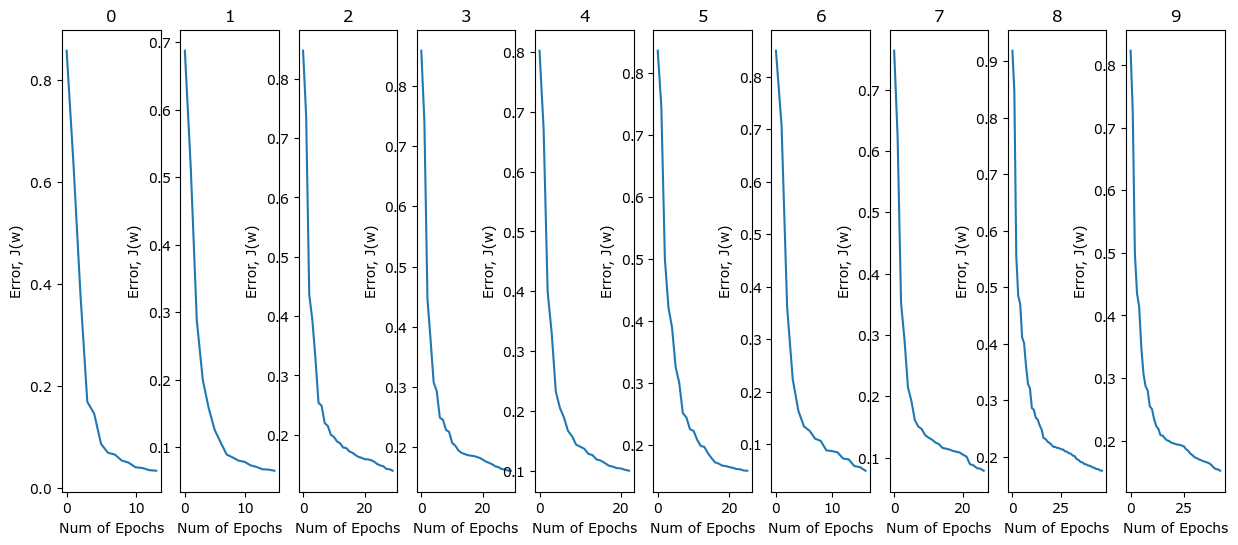

In [135]:
fig, ax = plt.subplots(1, len(l), figsize=(15, 6))

for i, li in enumerate(l):
    
    ax[i].plot(li)
    ax[i].set_title(i)

for ax in ax.flat:
    ax.set(xlabel='Num of Epochs' )
    ax.set(ylabel='Error, J(w)')
    
plt.show()

## Test Set:

In [75]:

y1t = one_hot(y_test,10)
y1t

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [76]:
m = X_test.shape[0]
Xt = np.concatenate([np.ones((m,1)), X_test], axis = 1)
Xt = Xt/255

In [77]:
y_pred = predict(wa[0],Xt)
y_pred.shape

(1500,)

In [78]:
pre= []
av = []
for c in range(0,10):
    y_pred = predict(wa[c],Xt)
    pre.append(y_pred)
    k = 0
    for i in range(len(y_test)):
        if y_test[i]==c:
            if y_test[i]==y_pred[i]:
                k = k+1
        else:
            if y_pred[i]==0:
                k=k+1
    av.append(k/len(y_test))
    print("Accuracy for class: ",c, " :" ,k/len(y_test)) 

Accuracy for class:  0  : 0.9086666666666666
Accuracy for class:  1  : 0.9913333333333333
Accuracy for class:  2  : 0.8853333333333333
Accuracy for class:  3  : 0.892
Accuracy for class:  4  : 0.8973333333333333
Accuracy for class:  5  : 0.9
Accuracy for class:  6  : 0.8986666666666666
Accuracy for class:  7  : 0.8833333333333333
Accuracy for class:  8  : 0.8893333333333333
Accuracy for class:  9  : 0.8746666666666667


In [79]:
print("Mean Accuracy for all classes: ", mean(av))

Mean Accuracy for all classes:  0.9020666666666666


**Testing Accuracy = 90.2%**

In [47]:
def get_index(pre, i):
    for j in range(10):
        if pre[j][i] ==1:
            return j

**Predicted/Actual labels for Test Set**

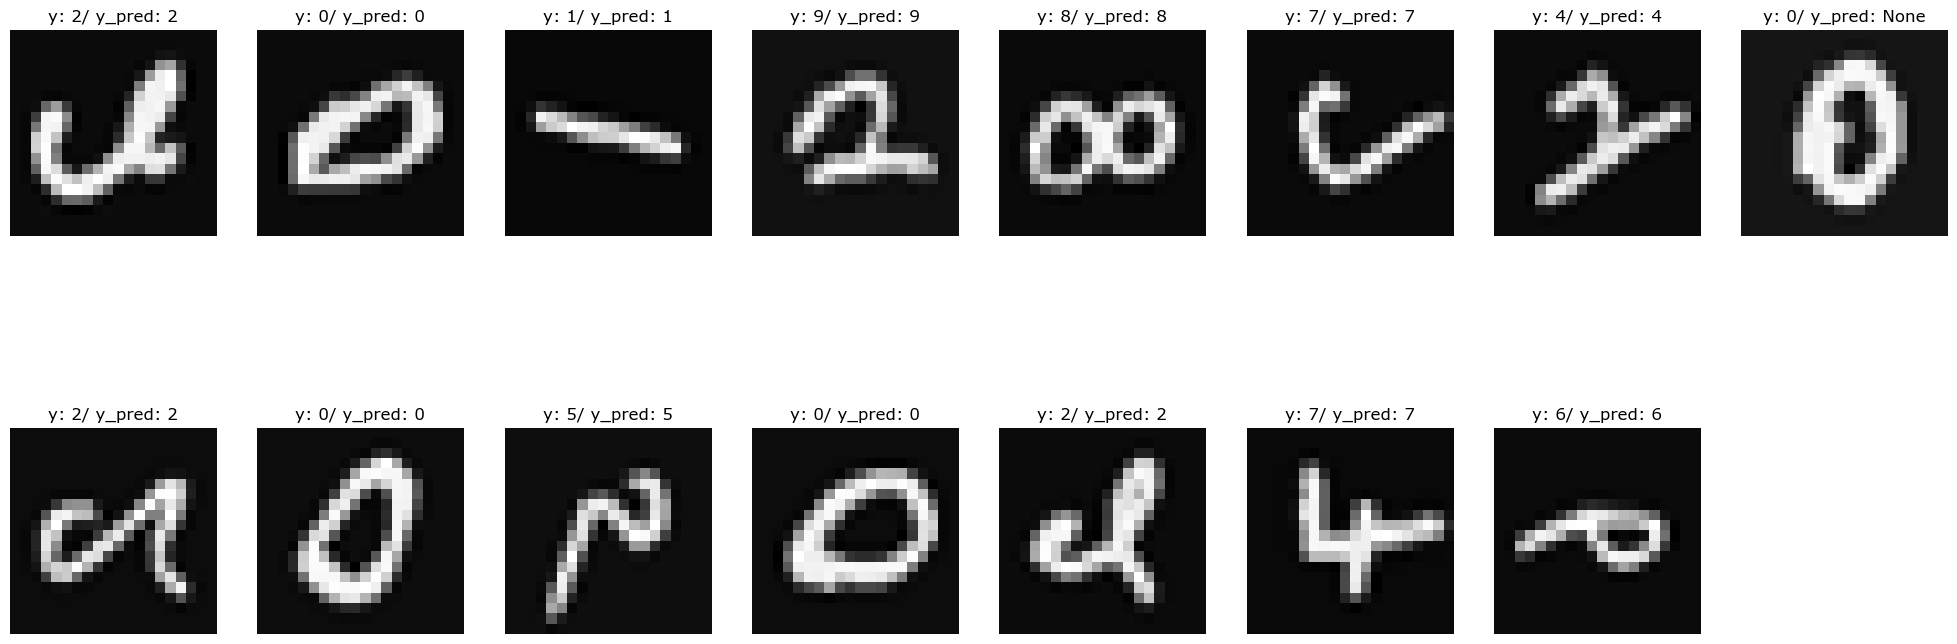

In [80]:
fig = plt.figure(figsize=(25,25))
for i in range(15):  
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(X_test[i].reshape(20,20), cmap=plt.get_cmap('gray'))
    ax.set_title('y: {y}/ y_pred: {y_pred}'.format(y=y_test[i], y_pred=(get_index(pre,i))))
    plt.axis('off')